In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def Plot_Scatter(y_test, y_predict, model_name = 'Model'):
    fig = plt.figure()
    fig.suptitle(model_name)
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.scatter(y_test,y_predict)
    plt.show()

In [ ]:
df = pd.read_csv('Erdeni_Houses_train.csv')
df

,Unnamed: 0,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,Price
0,0,66547.016454,5.846095,6.847298,4.13,27850.822901,"2288 Gary Square Apt. 812\nWest Jose, PR 78536...",1.094880e+06
1,1,53722.008599,6.401391,7.787764,3.30,47649.224665,USS Williams\nFPO AE 65283,1.300389e+06
2,2,64838.492899,6.437157,8.699544,4.02,32921.010068,Unit 2193 Box 7909\nDPO AA 47323-2101,1.382172e+06
3,3,67097.092120,6.086754,7.211963,3.05,27191.506877,"052 Thomas Square Apt. 034\nWrightmouth, OR 04272",1.027428e+06
4,4,75245.465436,8.167820,7.420100,3.42,37410.669928,"879 Martha Route Suite 031\nNew Nichole, VI 60708",1.562887e+06
...,...,...,...,...,...,...,...,...
3995,3995,76223.561256,6.371627,5.342217,2.42,30165.337445,"8456 Rodgers Burg Apt. 215\nSouth Michelle, NM...",1.023944e+06
3996,3996,56685.014442,6.958045,7.502115,3.38,43322.166854,"8584 Darrell Groves\nBennettberg, SD 72404-6826",1.223101e+06
3997,3997,66195.337714,6.507971,6.611861,3.14,37288.923574,"8367 Manuel Road\nNathanfort, AS 36077-1481",1.318598e+06
3998,3998,58694.515017,7.394768,9.269453,4.32,49960.977236,Unit 7385 Box 9302\nDPO AP 21450,1.708631e+06


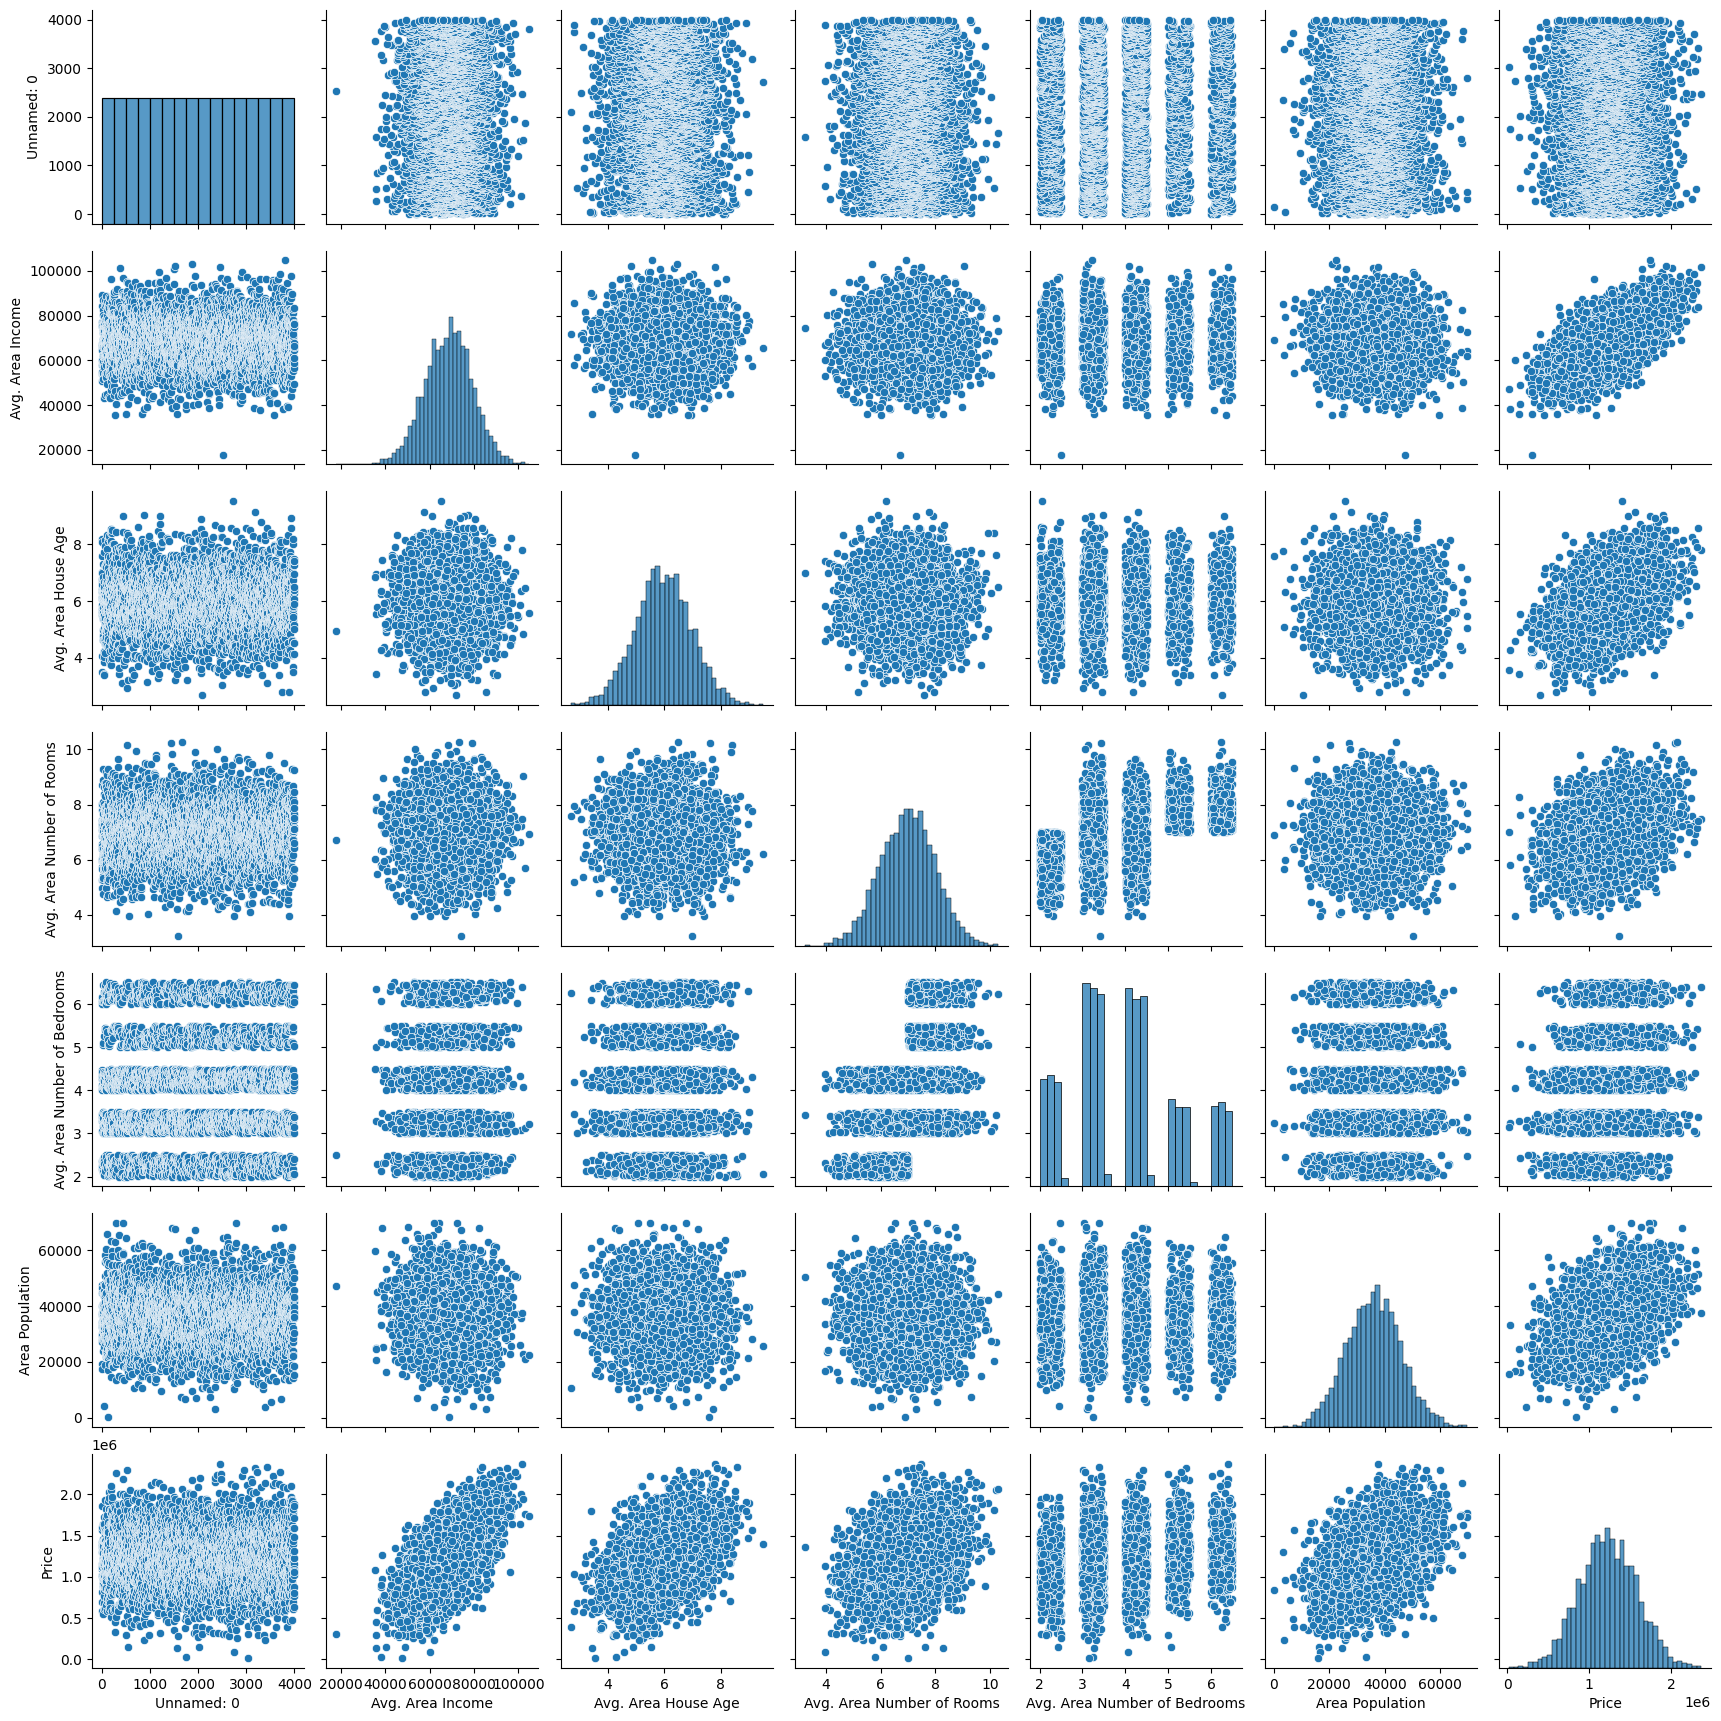

In [ ]:
sns.pairplot(df)

<Figure size 1000x800 with 0 Axes>

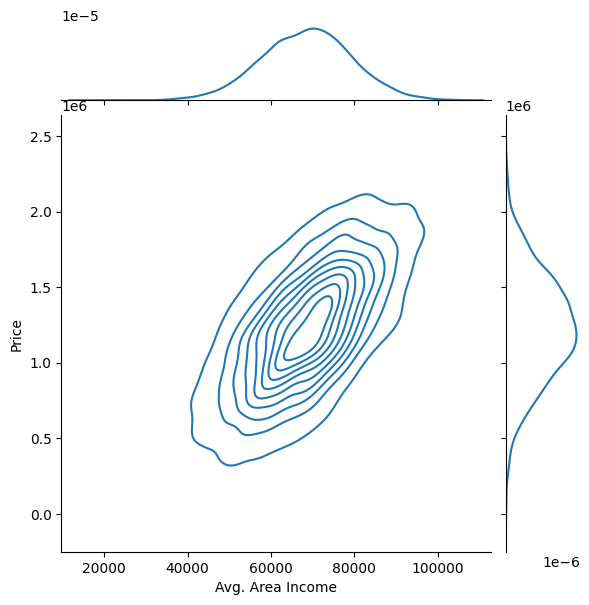

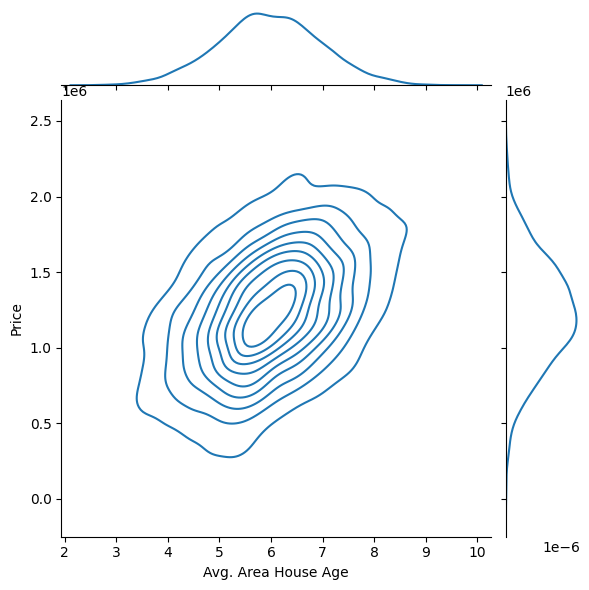

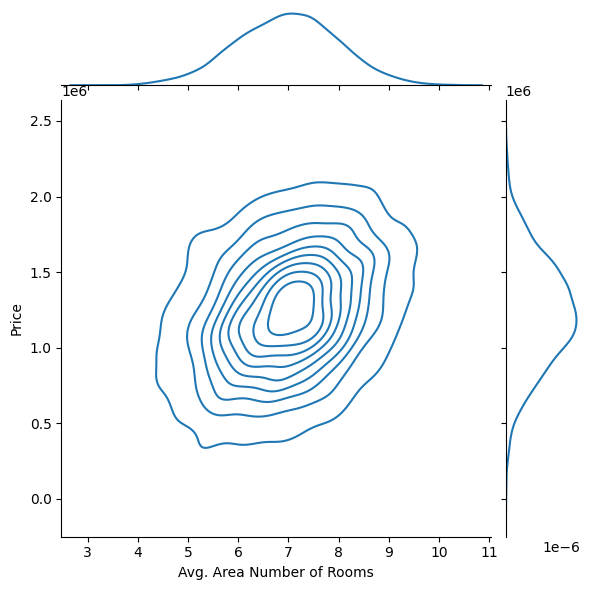

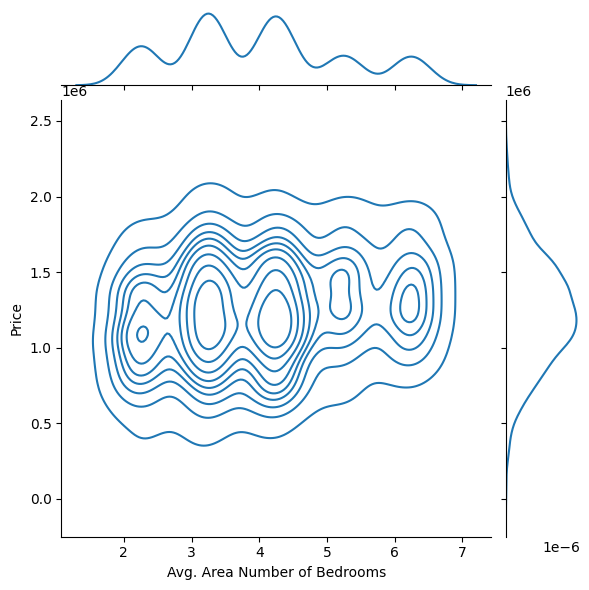

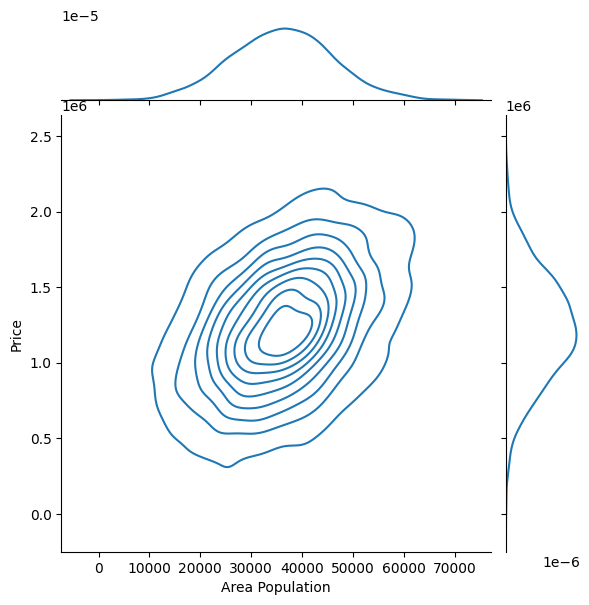

In [ ]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["Avg. Area Income"], y=df["Price"], kind="kde")
sns.jointplot(x=df["Avg. Area House Age"], y=df["Price"], kind="kde")
sns.jointplot(x=df["Avg. Area Number of Rooms"], y=df["Price"], kind="kde")
sns.jointplot(x=df["Avg. Area Number of Bedrooms"], y=df["Price"], kind="kde")
sns.jointplot(x=df["Area Population"], y=df["Price"], kind="kde")
plt.show()

In [ ]:
X = df.drop(['Price', 'Address'],axis=1).values
y = df['Price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
linmodel = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = linmodel.predict(X_test)

r2: 0.92
MAE:  80601.84197254662
RMSE:  100957.93273900214


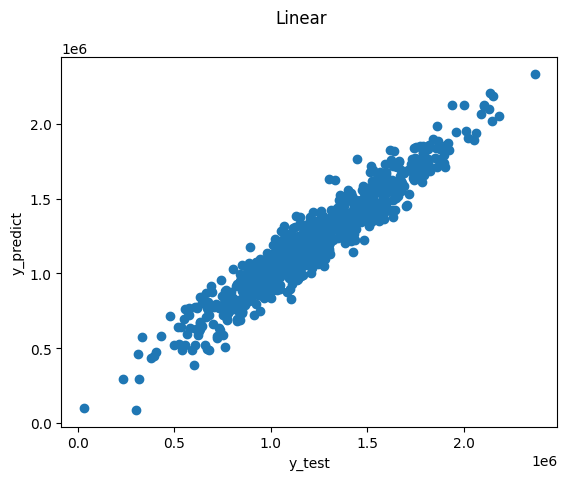

In [ ]:
print("r2:", round(r2_score(y_test, y_pred), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
Plot_Scatter(y_test, y_pred, "Linear")

In [ ]:
new_data = pd.read_csv('Erdeni_Houses_test.csv')
new_data = new_data.drop(['Address'],axis=1).values
Y_PRED = linmodel.predict(new_data)
Y_PRED

array([1307291.85674693, 1234995.80544929, 1244332.61257664,
       1228279.14821051, 1065825.24826875, 1545674.11401249,
       1091579.84165209,  832119.91925095,  785421.00569526,
       1471488.54652814,  671003.90122121, 1607046.54904938,
       1000902.35085948, 1794815.65306946, 1287781.98032536,
       1085346.43733787, 1421059.98592567, 1078557.86378748,
        801980.10853185,  931630.35223468, 1134984.92091931,
        916053.49235084, 1491863.21789105, 1284432.0274759 ,
       1583026.68832467, 1130765.50174971, 1086755.70555208,
        973910.45385301,  925225.06221265, 1740174.25058362,
       1287900.21049964, 1622858.41712136, 1432643.40449591,
       1232865.94255214, 1486828.80435433, 1720188.17789352,
       1539714.02264791,  772337.96195253, 1766309.4034493 ,
       1176588.52158426, 1557353.53249128,  895714.45600062,
       1368358.54924086,  844100.94565969, 1199505.3871518 ,
       1131356.04944826, 1361231.39054011, 1448303.53917401,
       1572980.58722939,

In [ ]:
error_rates = []

for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train, y_train)
    new_predictions = new_model.predict(X_test)
    error_rates.append(np.mean(new_predictions != y_test))

plt.plot(error_rates)

ValueError: ignored

In [ ]:
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
y_pred2 = knn.predict(X_test)

r2: 0.52
MAE:  192764.21689602226
RMSE:  242512.8340173845


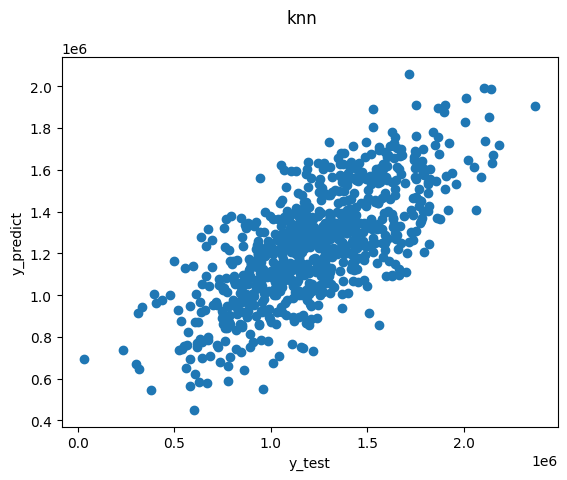

In [ ]:
print("r2:", round(r2_score(y_test, y_pred2), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred2))
print("RMSE: ", mean_squared_error(y_test, y_pred2, squared=False))
Plot_Scatter(y_test, y_pred2, "knn")

In [ ]:
randomforest = RandomForestRegressor(n_estimators=1000)
randomforest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred3 = randomforest.predict(X_test)

r2: 0.87
MAE:  97844.91965113654
RMSE:  124448.22863095794


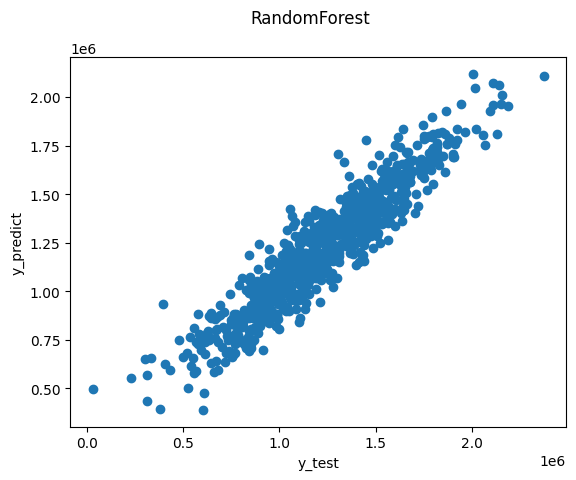

In [ ]:
print("r2:", round(r2_score(y_test, y_pred3), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("RMSE: ", mean_squared_error(y_test, y_pred3, squared=False))
Plot_Scatter(y_test, y_pred3, "RandomForest")

**Параметры для градиентного бустинга:**

1. **n_estimators**: Этот параметр указывает на количество деревьев в ансамбле. Увеличение количества деревьев может улучшить качество модели, но с определенного момента увеличение n_estimators может привести к переобучению или увеличению времени обучения.

2. **max_depth**: Определяет максимальную глубину каждого дерева в ансамбле. Более глубокие деревья могут захватывать более сложные зависимости в данных, но также могут привести к переобучению. Подбор оптимальной глубины важен для баланса между смещением и разбросом.

3. **criterion**: Отвечает за функцию оценки качества разбиения в деревьях. Для регрессии часто используется 'squared_error' (среднеквадратичная ошибка) или 'friedman_mse' (усовершенствованное среднеквадратичное отклонение Фридмана).

4. **learning_rate**: Управляет вкладом каждого дерева в общий ансамбль. Более низкие значения могут улучшить обобщающую способность модели, но при этом требуют большего количества деревьев для достижения того же уровня качества.

5. **min_samples_leaf**: Определяет минимальное количество образцов, необходимых для быть листом дерева. Большие значения могут помочь в борьбе с переобучением.

6. **min_samples_split**: Определяет минимальное количество образцов, необходимых для разделения внутреннего узла. Аналогично может использоваться для управления переобучением.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_leaf': [10, 20, 30, 40, 50],
    'min_samples_split': [10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

#я выдержала только полчаса, чатгпт сказал, что этот код бутед выполняться 2 часа, что ж, пожертвуем точностью ради времени и выберем оптимальные параметры по одному

KeyboardInterrupt: ignored

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'n_estimators': 200}


In [ ]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 3}


In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1}


In [ ]:
param_grid = {
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'min_samples_leaf': 30}


In [ ]:
param_grid = {
    'min_samples_split': [10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'min_samples_split': 20}


In [ ]:
params = {'n_estimators':300, #выбрала в итоге 300, а не 200, тк так mae и rmse чуть меньше
          'max_depth':3,
          'criterion':'squared_error',
          'learning_rate':0.1,
          'min_samples_leaf':30,
          'min_samples_split':20
          }

gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(criterion='squared_error', min_samples_leaf=30,
                          min_samples_split=20, n_estimators=300)

In [ ]:
y_pred4 = gbr.predict(X_test)

r2: 0.9
MAE:  90163.57527431432
RMSE:  113207.1548083392


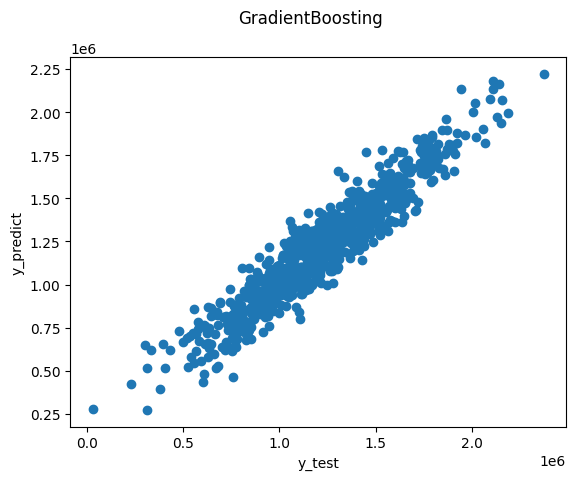

In [ ]:
print("r2:", round(r2_score(y_test, y_pred4), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred4))
print("RMSE: ", mean_squared_error(y_test, y_pred4, squared=False))
Plot_Scatter(y_test, y_pred4, "GradientBoosting")

In [ ]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {"alpha":[0.0000000000000001, 1, 2, 3]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(X_train,y_train)

print(ridge_regression.best_params_)
print(ridge_regression.best_score_) # mse

{'alpha': 1e-16}
-10313483945.838444


In [ ]:
y_pred5 = ridge_regression.predict(X_test)

r2: 0.92
MAE:  80601.84197255052
RMSE:  100957.9327390054


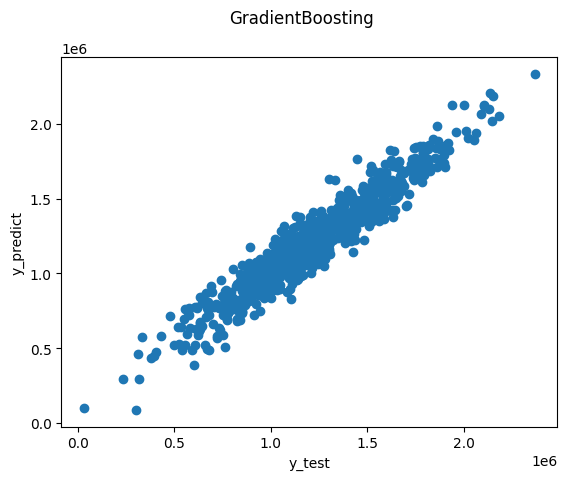

In [ ]:
print("r2:", round(r2_score(y_test, y_pred5), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred5))
print("RMSE: ", mean_squared_error(y_test, y_pred5, squared=False))
Plot_Scatter(y_test, y_pred5, "RidgeRegression")

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha":[1, 5, 10, 20, 30, 40]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train,y_train)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 30}
-10313482125.520245


In [ ]:
y_pred6 = lasso_regression.predict(X_test)

r2: 0.92
MAE:  80603.53012163943
RMSE:  100960.03633646047


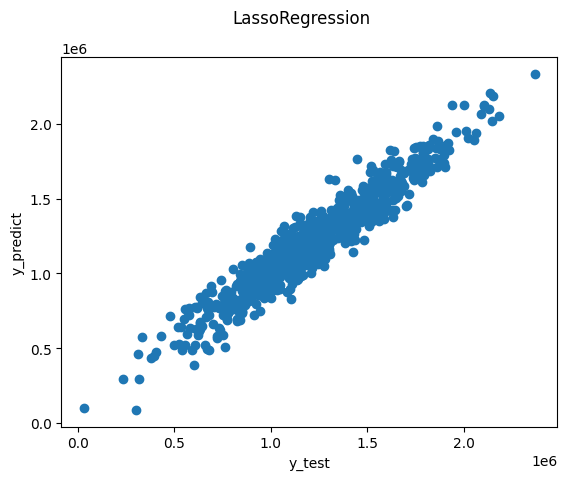

In [ ]:
print("r2:", round(r2_score(y_test, y_pred6), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred6))
print("RMSE: ", mean_squared_error(y_test, y_pred6, squared=False))
Plot_Scatter(y_test, y_pred6, "LassoRegression")